### Importing Necessary Libraries

In [17]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, model_selection, tree, ensemble, neighbors, preprocessing, base, metrics
import category_encoders
import imblearn

ModuleNotFoundError: No module named 'pandas'

In [16]:
warnings.filterwarnings("ignore")

### Data Collection

In [3]:
path = r"C:\Bio_AI\Breast_GSE45827.csv"

df = pd.read_csv(path)
print(df.shape)

(151, 54677)


In [4]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [5]:
df.dtypes

samples              int64
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 63.0+ MB


In [7]:
df.iloc[:, :10].describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260
50%,159.000000,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957
75%,200.500000,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337
max,238.000000,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006


### Data Preprocessing and Preparation

In [8]:
# Checking for duplicates

print(f"Total duplicates: {df.duplicated().sum()}")

Total duplicates: 0


In [9]:
# Null count in each feature

print(df.isna().sum())

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64


In [10]:
# Total null count

print(f"Total null count: {df.isna().sum().sum()}")

Total null count: 0


type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64 




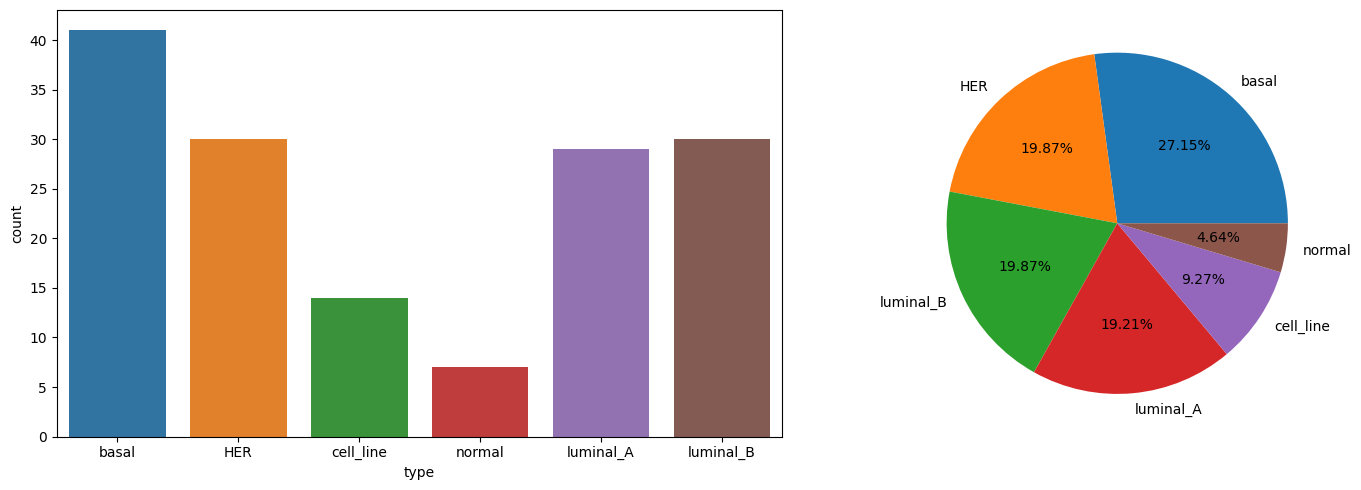

In [11]:
target  = "type"

val_counts = df[target].value_counts()
print(val_counts, "\n\n")

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = df[target])

plt.subplot(1, 2, 2)
plt.pie(val_counts, labels = val_counts.keys(), autopct = "%.2f%%")

plt.tight_layout()
plt.show()

In [12]:
# Encoding categorical feature(s) (Ordinal Encoding)

class_map = {"normal": 0, "cell_line": 1, "luminal_A": 2, "luminal_B": 3, "HER": 4, "basal": 5}
class_map_reverse = {m : n for m, n in zip(class_map.values(), class_map.keys())}

encoder = category_encoders.OrdinalEncoder(cols = [target], mapping = [{"col": target, "mapping": class_map}])

df['type'] = encoder.fit_transform(df[target])

In [13]:
X = df.drop(target, axis = 1).values
y = df[target].values

print(X.shape, y.shape)

(151, 54676) (151,)


In [14]:
# Splitting the data into testing and training data (Stratified Splitting)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 3, stratify = y)

print(X_train.shape, X_test.shape)

(120, 54676) (31, 54676)


In [15]:
# Feature Scaling (Z-Score Normalization)

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

print(X_train[0].mean(), X_train[0].std())

0.11595630685744691 1.1493358820281627


Train Set:
5    33
4    24
3    24
2    23
1    11
0     5
Name: count, dtype: int64


Test Set:
5    8
3    6
4    6
2    6
1    3
0    2
Name: count, dtype: int64




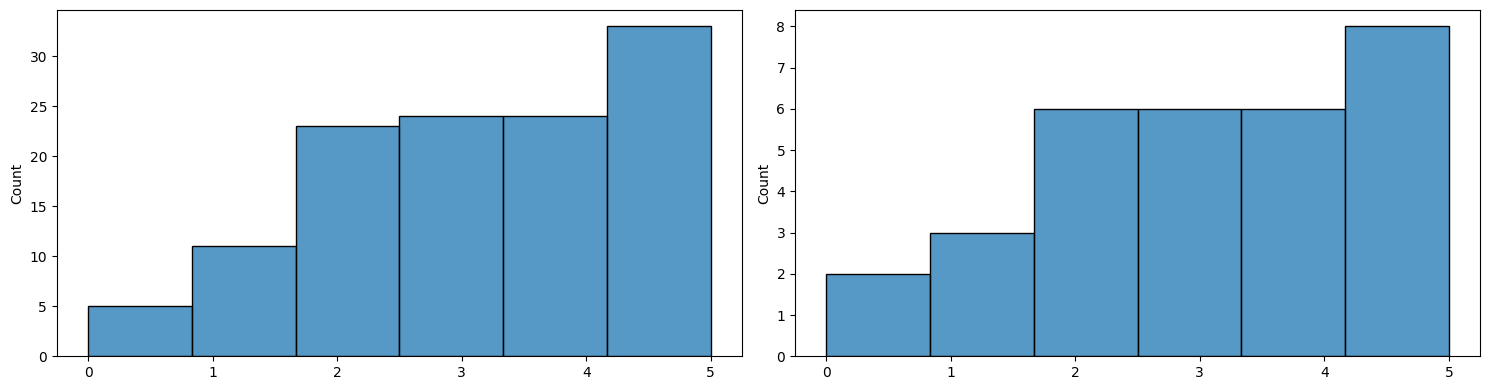

In [16]:
# Checking uniformity of labels across train and test data sets

print(f"Train Set:\n{pd.Series(y_train).value_counts()}\n\n")
print(f"Test Set:\n{pd.Series(y_test).value_counts()}\n\n")

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.histplot(y_train, bins = len(np.unique(y_train)))

plt.subplot(1, 2, 2)
sns.histplot(y_test, bins = len(np.unique(y_test)))

plt.tight_layout()
plt.show()

In [17]:
# Handling class imbalance through Synthetic Minority Over-sampling Technique (SMOTE)

smote = imblearn.over_sampling.SMOTE(random_state = 3, k_neighbors = 3)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape, y_train_resampled.shape)

(198, 54676) (198,)


In [18]:
print(pd.Series(y_train_resampled).value_counts())

0    33
4    33
2    33
5    33
1    33
3    33
Name: count, dtype: int64


In [19]:
X_train, y_train = X_train_resampled.copy(), y_train_resampled.copy()

### Model Selection

In [20]:
# Cross Validation (Stratified K-Fold)

avg = lambda x: x.sum() / len(x)

models = [linear_model.LogisticRegression(max_iter = 1000), svm.SVC(), tree.DecisionTreeClassifier(), ensemble.RandomForestClassifier(), neighbors.KNeighborsClassifier(n_neighbors = 3)]
model_names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "KNN"]
scores = []

for idx, model in enumerate(models):
    scores.append(avg(model_selection.cross_val_score(model, X_train, y_train, cv = 5)))
    print(f"{model_names[idx]} training completed !")

model_scores = {x : y for x, y in zip(model_names, scores)}
print(model_scores)

Logistic Regression training completed !
SVM training completed !
Decision Tree training completed !
Random Forest training completed !
KNN training completed !
{'Logistic Regression': 0.9747435897435898, 'SVM': 0.9897435897435898, 'Decision Tree': 0.9444871794871796, 'Random Forest': 0.9798717948717949, 'KNN': 0.8135897435897436}


### Model Training

In [21]:
model = models[np.argmax(scores)]
model.fit(X_train, y_train)

SVC()

In [22]:
model.score(X_test, y_test)

0.967741935483871

In [23]:
svm.SVC()

SVC()

### Hyperparameter Tuning

In [ ]:
param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [1.0, 2.0, 5.0],
    "gamma": ["scale", "auto"],
}

random_model = model_selection.GridSearchCV(base.clone(model), param_grid, cv = 5)
random_model.fit(X_train, y_train)

In [ ]:
print(random_model.best_params_)

pd.DataFrame(random_model.cv_results_)

In [ ]:
model = random_model.best_estimator_

In [ ]:
print(model.score(X_test, y_test))

### Model Evaluation

In [ ]:
y_test_pred = model.predict(X_test)

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
clf_report = metrics.classification_report(y_test, y_test_pred)
print(clf_report)

In [ ]:
# ROC Curve (Training Data)

for i in range(len(np.unique(y_train))):
    y_train_ = (y_train == i).astype(int)
    model_ = svm.SVC(probability = True)
    cv_pred_prob = model_selection.cross_val_predict(model_, X_train, y_train_, cv = 3, method = "predict_proba")
    fpr, tpr, thresholds = metrics.roc_curve(y_train_, cv_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = class_map_reverse[i])
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")

    auc = metrics.roc_auc_score(y_train_, cv_pred_prob[:, 1])
    print(f"Area under ROC curve for class {i}: {auc}")
plt.show()

In [ ]:
# Precision-Recall Curve

for i in range(len(np.unique(y_train))):
    y_train_ = (y_train == i).astype(int)
    model_ = svm.SVC(probability = True)
    cv_pred_prob = model_selection.cross_val_predict(model_, X_train, y_train_, cv = 3, method = "predict_proba")
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_train_, cv_pred_prob[:, 1])
    plt.plot(precisions, recalls, label = class_map_reverse[i])
    plt.title("Precision-Recall Curve")
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.legend()
plt.show()